## Data Breach Analytics 2005 - 2017 (Business Questions and Support)

**By Miriam Rodriguez**


### Exploratory Data Analysis(EDA) and Data Visualization
- Correlation 
- Basic Statistical Analysis 
- Hypothesis Testing
- Data visualization
- Insights from EDA and data visualization

### Data Description

#### Dataset
- Dataset name:              databreach_cleaned.csv
- Duration of the data:      2005 through 2017

#### Data Breach Types
- 1: CARD - Payment Card Fraud:    Fraud involving debit and credit cards that is not accomplished via hacking (e.g.                                                skimming devices at point-of-service terminals).
- 2: HACK - Hacking or Malware:    Hacked by outside party or infected by malware
- 3: INSD - Insider:               Someone with legitimate access intentionally breaches information, such as an employee,                                          contractor, or customer)
- 4: PHYS - Physical Loss:         Includes paper documents that are lost, discarded, or stolen (non-electronic)
- 5: PORT - Portable Device:       Lost, discarded, or stolen laptop, PDA, smartphone, memory stick, CDs, hard drive, data                                          tape, etc.
- 6: STAT - Stationary Device:     Stationary computer loss (lost, inappropriately accessed, discarded, or stolen computer                                          or server not designed for mobility)
- 7: DISC - Unintended Disclosure: Unintended disclosure (not involving hacking, intentional breach, or physical loss i.e.                                          sensitive information posted publicly, mishandled, sent to the wrong party via publishing                                      online, sending in an email, sending in a mailing or sending via fax.
- 0: Unknown

#### Institution/Organization) Type
Numeric/ Alpha/  Description
- 1     BSF - Businesses - Financial and Insurance Services
- 2	    BSO - Businesses - Other
- 3  	BSR - Businesses - Retail/Merchant – Including Online Retail
- 4 	EDU - Educational Institutions
- 5 	GOV - Government & Military
- 6 	MED - Healthcare - Medical Providers & Medical Insurance Services
- 7 	NGO - Nonprofit Organizations

#### Data elements/column names
1.	Breach_Year: Year Breach information released to public 
2.	Company: Company breached (text)
3.	State: State of breached company (text)
4.	Breach_Type: Refer to four-character Breach Type above
5.	Organization_Type: Refer to three-character Institution/Organization Type above
6.	Total_Records: Number of records breached (integer)
7.	Descriptiont: Text describing breach (text)
8.	Breach_Type_CAT: Numerical assignment to four-character Breach Type above
9.	Organization_Type_CAT: Numerical assignment to three-character Institution/Organization Type above
10.	Latitude: Location Latitude (signed numeric long)
11.	Longitude: Location Longitude (signed numeric long)

#### State column names 
1.
2.
...
53

#### Breach_Year column names
1. 2005
2. 2006
3. 2007
4. 2008
5. 2009
6. 2010
7. 2011
8. 2012
9. 2013
10. 2014
11. 2015
12. 2016
13. 2017
14. 2018

### Importing packages 

In [1]:
# the popular python package for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import some other packages
import numpy as np
import pandas as pd
import seaborn as sns  #package for statistical data visualization
from scipy import stats
from pandas.tools import plotting
import datetime
from sklearn import linear_model



# Importing Data & Processing (ETL)

In [4]:
#import breach data ... open or read the breach data
df = pd.read_csv("databreach_cleaned.csv")
df.head(2)

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",37.090240,-95.712891,5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",35.960638,-83.920739,5,6,0,3,75725457


## Part I: Business Questions

### What types of data breaches are more popular than others or which data breach type is most popular?

**In terms of the number of incidents, out of 8177 incidents, 2,431 were caused by hacking.** 

In [3]:
#describe the column Type of Breach only (e.g., count, unique, frequency)
df['Breach_Type'].describe()

count     8177
unique       8
top       HACK
freq      2431
Name: Breach_Type, dtype: object

**In terms of the number of total records, hacking caused the greatest degree of harm compared to all other causes.** 

In [5]:
df.groupby('Breach_Type').Total_Recs.sum()

Breach_Type
CARD       9203036
DISC    2223075024
HACK    7733557148
INSD      83580556
PHYS      39600563
PORT     185650895
STAT      16235932
UNKN     202910247
Name: Total_Recs, dtype: int64

Text(0.5,1,'Total Records by Breach Type')

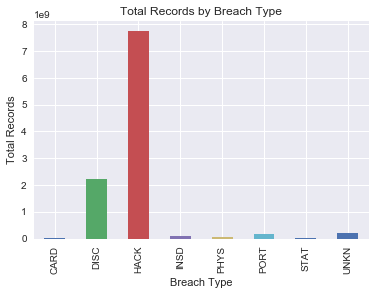

In [209]:
bt_count = df.groupby('Breach_Type').Total_Recs.sum()
plt.figure
bt_count.plot(kind='bar')
plt.xlabel('Breach Type')
plt.ylabel('Total Records')
plt.title("Total Records by Breach Type")

### What are the three main causes of data breach?

**Comparison of the results below reveal the top three causes are Hacking, Disclosure, and Physical Theft**

In [6]:
df.groupby(['Breach_Type']).size()

Breach_Type
CARD      68
DISC    1708
HACK    2431
INSD     609
PHYS    1691
PORT    1172
STAT     249
UNKN     249
dtype: int64

In [7]:
# Breaches by Breach Type
bcount = df.groupby('Breach_Type').size()

Text(0.5,1,'Breach Occurrences by Breach Type')

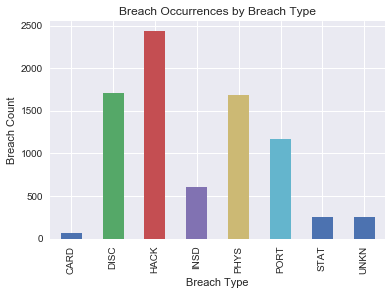

In [8]:
plt.figure
bcount.plot(kind='bar')
plt.xlabel('Breach Type')
plt.ylabel('Breach Count')
plt.title("Breach Occurrences by Breach Type")

### What types of organizations are more likely to have a data breach? Which organization type has the highest number of data breaches?

**In terms of the number of incidents, healthcare (MED) organizations had the highest number of data breaches.** 

In [9]:
df.groupby('Organization_Type').size()

Organization_Type
BSF     746
BSO    1028
BSR     615
EDU     818
GOV     775
MED    4077
NGO     118
dtype: int64

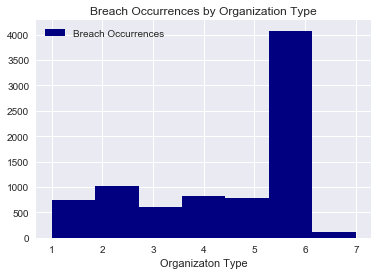

In [10]:
# using matplotlib
# Histogram of Breach occurrences by Organization Type - Visualization
bins = 7
plt.hist(df['Organization_Type_CAT'], bins, color='navy', label="Breach Occurrences")
plt.xlabel('Organizaton Type')
plt.title('Breach Occurrences by Organization Type')
plt.legend()

#### Institution/Organization) Type
Numeric/ Alpha/  Description
- 1     BSF - Businesses - Financial and Insurance Services
- 2	    BSO - Businesses - Other
- 3  	BSR - Businesses - Retail/Merchant – Including Online Retail
- 4 	EDU - Educational Institutions
- 5 	GOV - Government & Military
- 6 	MED - Healthcare - Medical Providers & Medical Insurance Services
- 7 	NGO - Nonprofit Organizations

#### In terms of the number of total records affected, businesses categorized as other (BSO) were the hardest hit.  

In [11]:
df.groupby('Organization_Type').Total_Recs.sum()

Organization_Type
BSF     643326992
BSO    8584664122
BSR     774221630
EDU      25162790
GOV     227408042
MED     230595280
NGO       8434545
Name: Total_Recs, dtype: int64

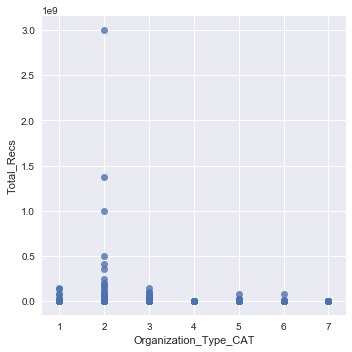

In [211]:
# draw a scatter chart: Total Records Breached vs Organization Type 
sns.lmplot('Organization_Type_CAT', 'Total_Recs', data=df, fit_reg=False)

**Which organization types appear to be the target of data breaches?**

- MED    4077
- BSO    1028
- EDU     818
- GOV     775
- BSF     746
- BSR     615
- NGO     118

**The biggest target appears to be healthcare, followed by other businesses.  Educational, government, financial services, retail (including online) and least non-government organizations.** 

## States & Data Breaches

## Which US states are more likely to have data breaches?

### Florida, Texas, California and New York seem to be targets for data breaches. In terms of harm (total records), California, Wisconsin and Oregon are the top states.

In [16]:
df.groupby('State').Total_Recs.sum()

State
Alabama                    2863834
Alaska                      162796
Arizona                   44480790
Arkansas                   1344475
California              5531439456
Colorado                   5746790
Connecticut                3619364
Delaware                   4345634
District Of Columbia     194504597
Florida                   60040680
Georgia                  239752572
Hawaii                      491635
Idaho                       151068
Illinois                  21123920
Indiana                  167560413
Iowa                        753380
Kansas                     7855156
Kentucky                   1513836
Louisiana                   394598
Maine                      4246207
Maryland                  10717217
Massachusetts            104877649
Michigan                   4017796
Minnesota                 45936241
Mississippi                 267347
Missouri                   8991542
Montana                    1470636
Nebraska                   7769896
Nevada        

In [18]:
df.groupby('State').Breach_Type_CAT.sum()

State
Alabama                  309
Alaska                    90
Arizona                  495
Arkansas                 234
California              4946
Colorado                 696
Connecticut              554
Delaware                  70
District Of Columbia     583
Florida                 1753
Georgia                  962
Hawaii                   116
Idaho                     78
Illinois                1351
Indiana                  863
Iowa                     250
Kansas                   224
Kentucky                 493
Louisiana                258
Maine                    101
Maryland                1440
Massachusetts            893
Michigan                 577
Minnesota                599
Mississippi              157
Missouri                 551
Montana                  143
Nebraska                 149
Nevada                   231
New Hampshire            149
New Jersey               590
New Mexico               224
New York                2504
North Carolina           904
North Da

In [35]:
# Obtain counts to get breach count by State
st_count = df.groupby('State').Total_Recs.sum()

In [30]:
# how many breaches were in each breach type category by state
breachtype_count = df.groupby('State').Breach_Type.count()

Text(0.5,1,'Total Records Affected by Breaches by State')

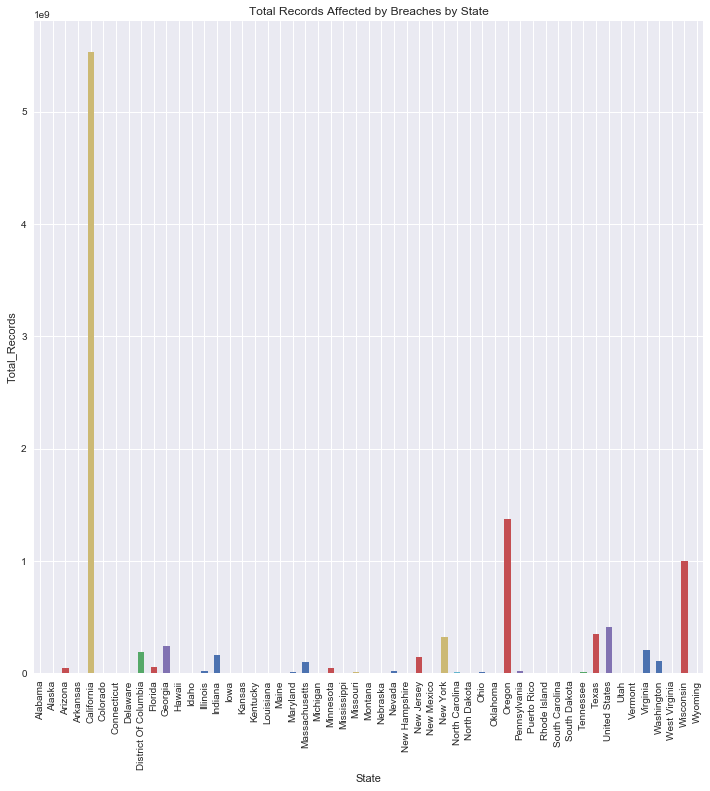

In [38]:
bins = 53
#plt.figure
plt.figure(bins, figsize=(12,12))
st_count.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total_Records')
plt.title("Total Records Affected by Breaches by State")

Text(0.5,1,'Breaches by State')

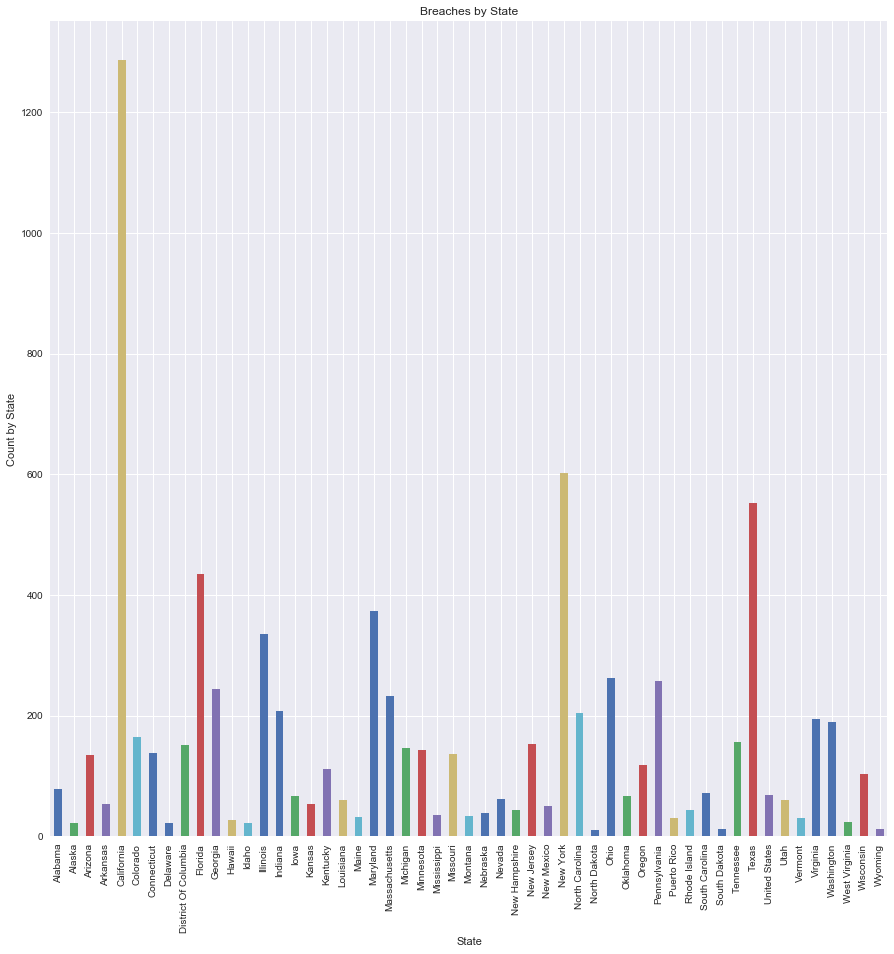

In [34]:
bins = 53
#plt.figure
plt.figure(bins, figsize=(15,15))
breachtype_count.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count by State')
plt.title("Breaches by State")

### Which US states are less likely to have data breaches? (probability).  

**Based on past years, it appears that North and South Dakota and Wyoming have the least chance of data breaches.**

### What are the top three states in terms of the number of data breaches in 2017?

### Per the below graphs and counts for 2017 (Year_CAT = 13), California, New York and Texas are the top three states.

In [60]:
df_y2017 = df[df.Year_CAT == 13]

In [62]:
# how many breaches were in 2017 by state
breach_2017_count = df_y2017.groupby('State').Breach_Type.count()

Text(0.5,1,'Breaches by State')

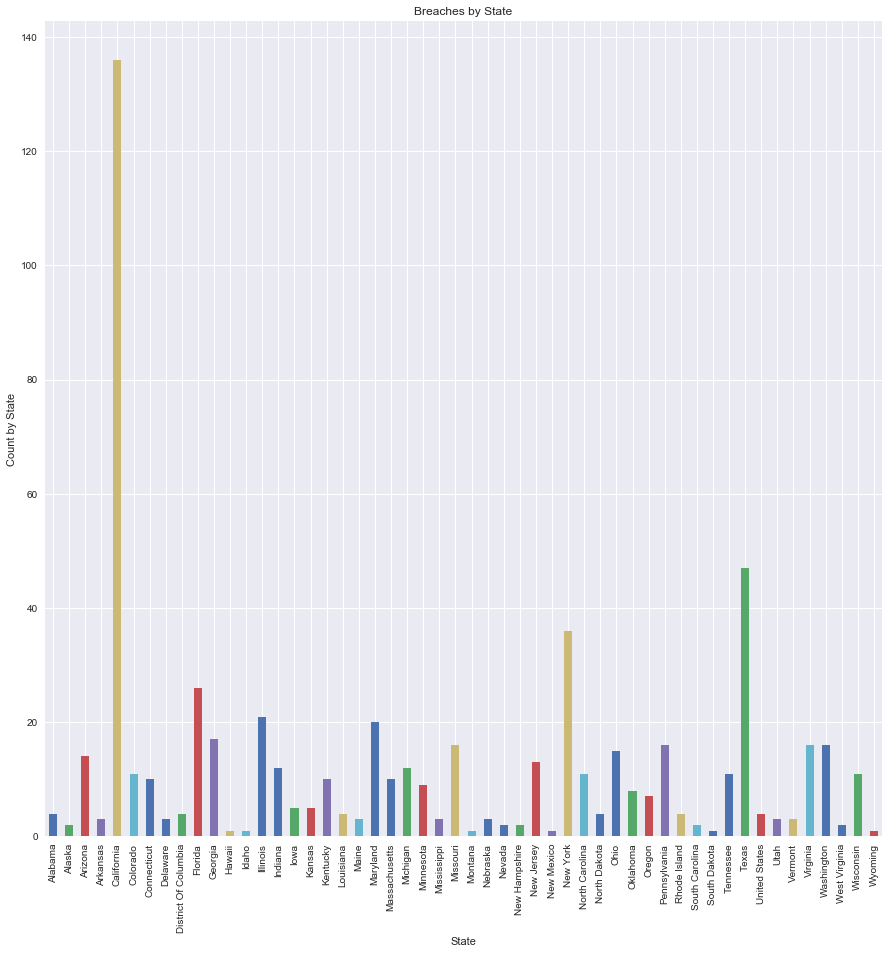

In [63]:
bins = 53
#plt.figure
plt.figure(bins, figsize=(15,15))
breach_2017_count.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count by State')
plt.title("Breaches by State")

In [61]:
df_y2017.groupby(['State']).size()

State
Alabama                   4
Alaska                    2
Arizona                  14
Arkansas                  3
California              136
Colorado                 11
Connecticut              10
Delaware                  3
District Of Columbia      4
Florida                  26
Georgia                  17
Hawaii                    1
Idaho                     1
Illinois                 21
Indiana                  12
Iowa                      5
Kansas                    5
Kentucky                 10
Louisiana                 4
Maine                     3
Maryland                 20
Massachusetts            10
Michigan                 12
Minnesota                 9
Mississippi               3
Missouri                 16
Montana                   1
Nebraska                  3
Nevada                    2
New Hampshire             2
New Jersey               13
New Mexico                1
New York                 36
North Carolina           11
North Dakota              4
Ohio          

## Relationships between organizations, state and data breaches

### Organizations & Data breaches

### Which organization type is more vulnerable to “Hackers”?

### The organization type most vulnerable to 'Hackers' is healthcare (MED).

In [47]:
df_hack = df[df.Breach_Type == 'HACK']

In [66]:
## Count of Breach Type = hacking by Organization
df_hack.groupby(['Organization_Type']).size()

Organization_Type
BSF    210
BSO    602
BSR    298
EDU    288
GOV    147
MED    848
NGO     38
dtype: int64

In [67]:
## Effect of Organization by Breach Type
df.groupby(['Breach_Type', 'Organization_Type']).size()

Breach_Type  Organization_Type
CARD         BSF                    24
             BSO                     5
             BSR                    37
             EDU                     1
             MED                     1
DISC         BSF                   122
             BSO                   116
             BSR                    66
             EDU                   238
             GOV                   225
             MED                   926
             NGO                    15
HACK         BSF                   210
             BSO                   602
             BSR                   298
             EDU                   288
             GOV                   147
             MED                   848
             NGO                    38
INSD         BSF                   101
             BSO                    63
             BSR                    73
             EDU                    26
             GOV                    80
             MED                 

## What is the most popular data breach type for education?

### Per below, the most popular breach type for education was hacking.

## What is the most popular data breach type for medical organizations?

### When looking at breach types within organizations, medical organizations are impacted the most by physical record losses. 

In [64]:
## Effect on Organizations by Breach Type
df.groupby(['Organization_Type', 'Breach_Type']).size()

Organization_Type  Breach_Type
BSF                CARD             24
                   DISC            122
                   HACK            210
                   INSD            101
                   PHYS             64
                   PORT            161
                   STAT             27
                   UNKN             37
BSO                CARD              5
                   DISC            116
                   HACK            602
                   INSD             63
                   PHYS             61
                   PORT            137
                   STAT             22
                   UNKN             22
BSR                CARD             37
                   DISC             66
                   HACK            298
                   INSD             73
                   PHYS             38
                   PORT             66
                   STAT             16
                   UNKN             21
EDU                CARD          

## Which state is more vulnerable to “Hackers”?

### California is the most vulnerable to hackers.

In [51]:
## Count of Breach Type = hacking by State
df_hack.groupby(['State']).size()

State
Alabama                  18
Alaska                    8
Arizona                  36
Arkansas                 14
California              461
Colorado                 44
Connecticut              42
Delaware                 12
District Of Columbia     57
Florida                  96
Georgia                  72
Hawaii                    7
Idaho                     9
Illinois                 91
Indiana                  59
Iowa                     26
Kansas                   11
Kentucky                 22
Louisiana                11
Maine                    15
Maryland                156
Massachusetts            76
Michigan                 47
Minnesota                35
Mississippi               8
Missouri                 45
Montana                  11
Nebraska                 14
Nevada                   22
New Hampshire            21
New Jersey               56
New Mexico                9
New York                161
North Carolina           41
North Dakota              3
Ohio          

## Which state is more vulnerable to “CARD”?

### California and New York are the most vulnerable to Credit Card breaches

In [52]:
df_card = df[df.Breach_Type == 'CARD']

In [53]:
## Count of Breach Type = credit card by State
df_card.groupby(['State']).size()

State
Arizona            3
Arkansas           1
California        13
Florida            6
Georgia            2
Illinois           3
Maine              1
Massachusetts      2
Michigan           2
Minnesota          3
Missouri           1
Nevada             1
New Jersey         1
New York          10
North Carolina     2
Ohio               3
Oklahoma           1
Pennsylvania       2
Tennessee          1
Texas              3
United States      1
Utah               2
Virginia           1
Washington         2
Wisconsin          1
dtype: int64

In [68]:
#df.groupby(['State', 'Breach_Type', 'Organization_Type']).size()

### Organizations, data breaches & time

**Visualization of data breaches over time (time series analysis).**

In [70]:
# Convert year to string to get meaningful statistics
df['Breach_Year'] = df['Breach_Year'].astype(str)

**Remove data breach incidents occurring in 2018** 

In [71]:
df_time = df[df.Breach_Year != '2018']

### How many breaches per year?

In [80]:
# get a count of breaches per year by breach type                  
breach_count = df_time.groupby('Breach_Year').Breach_Type.count()

Text(0.5,1,'Breaches by Year')

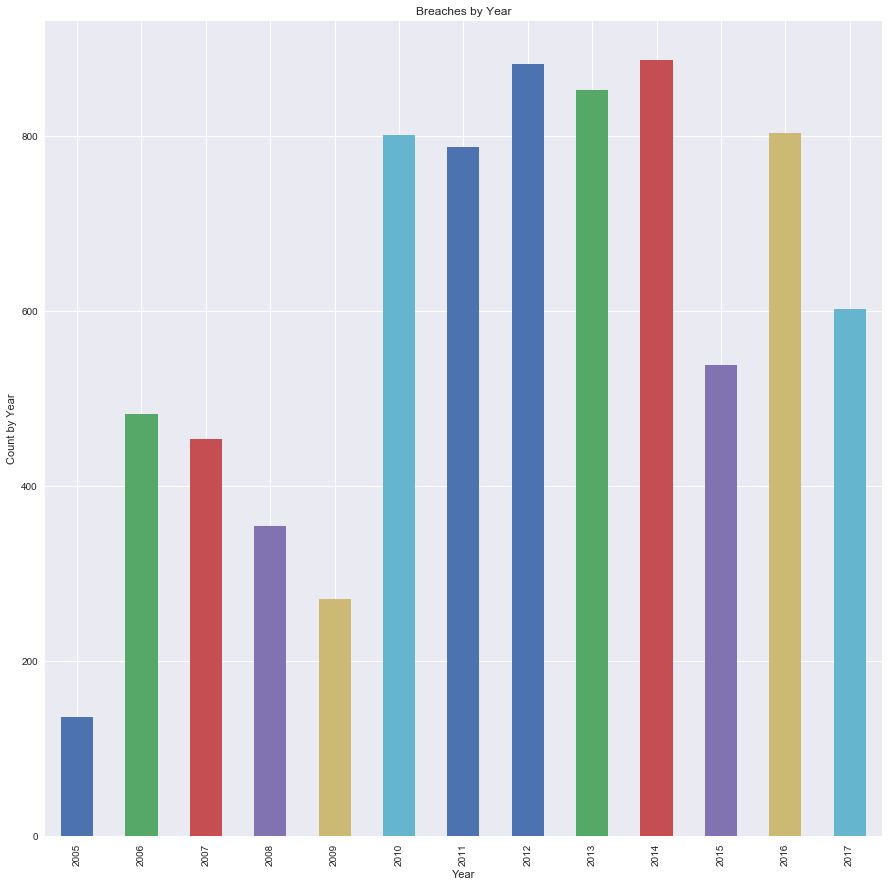

In [81]:
# breaches bar graph
bins = 13
#plt.figure
plt.figure(bins, figsize=(15,15))
breach_count.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count by Year')
plt.title("Breaches by Year")

In [83]:
# legend for the above graph
df_time.groupby(['Breach_Year']).size()

Breach_Year
2005    136
2006    482
2007    454
2008    355
2009    271
2010    801
2011    788
2012    882
2013    852
2014    887
2015    539
2016    804
2017    602
dtype: int64

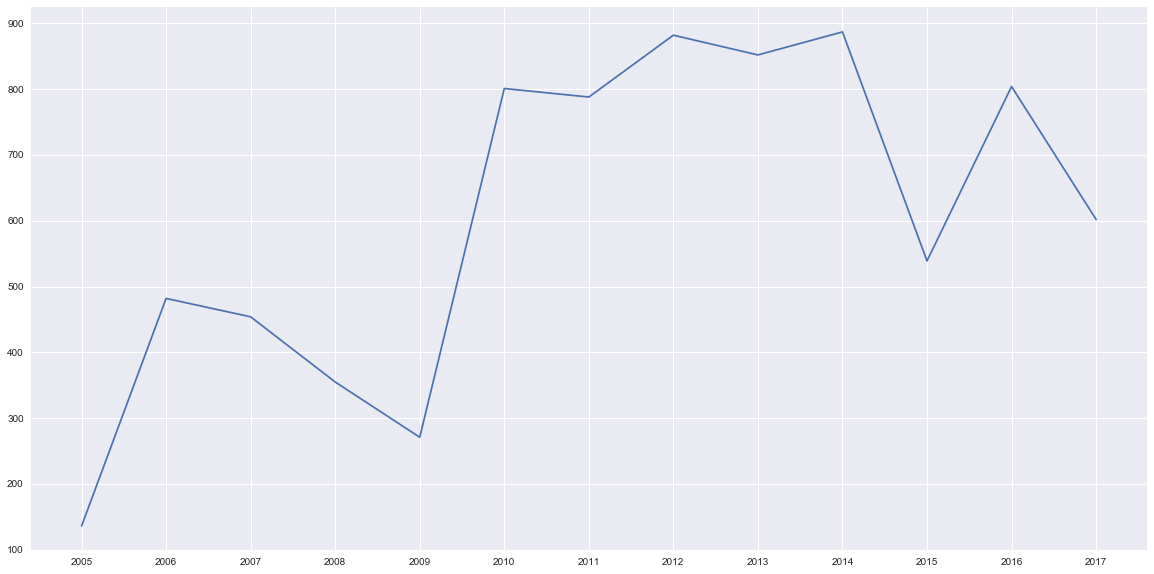

In [85]:
# Line graph to show trend
plt.figure(figsize=(20,10))
plt.plot(breach_count)

 ### Is there any trend in data breaches over time (between 2005 and 2017)?

**It appears that the trend is showing an increase over time.**

###  Any relationship between time and data breach type? 

**There are different types of breaches and associated organizations that are more or less popular depending on the year.**

In [120]:
## Effect on Organizations by Breach Type
df_time.groupby(['Breach_Year', 'Breach_Type', 'Organization_Type']).size()

Breach_Year  Breach_Type  Organization_Type
2005         DISC         BSF                    2
                          BSO                    1
                          BSR                    3
                          EDU                   11
                          GOV                    1
                          MED                    2
             HACK         BSF                    2
                          BSO                    1
                          BSR                    2
                          EDU                   40
                          GOV                    2
                          NGO                    1
             INSD         BSF                    3
                          BSO                    3
                          EDU                    1
                          GOV                    1
                          MED                    2
             PHYS         BSF                    1
                          BSR         

    - Any data breach type in increase over time?

 - Any data breach type declining over time?

### Multiple data breaches (repeating incidents) - Organizations that have experienced repeated incidents

- How many organizations (“company”) have multiple data breaches (more than one data breach between 2005 and 2017)?

- What organization types are more likely to experience multiple data breaches (more than one data breach between 2005 and         2017) than other organization types?

## Part II: Statistical analysis

1. First hypothesis - “two data breach types—DISC and HACK—are equal in the harm caused to organizations in terms of records affected (“TotalRecords”)”. You need to test this hypothesis. Interpret the results and provide implications.

2. Second hypothesis - “all data breach types are equal in the harm caused to organizations in terms of records affected (“Total_Recs”)”. You need to test this hypothesis. Interpret the results and provide implications.

- Which type of data breach tends to cause the most harm (the number of records affected) to organizations?